In [1]:
from  gwpy.timeseries import TimeSeriesDict
import matplotlib 
%matplotlib inline

In [2]:
# channel and file information for event S190924h
channels = ['L1:DCS-CALIB_STRAIN_CLEAN_C01',
            'L1:DCS-CALIB_STRAIN_CLEAN_C01_glitch',
            'L1:DCS-CALIB_STRAIN_CLEAN_C01_T1700406_v4']
data_dict = TimeSeriesDict.read('L-L1_HOFT_C01_T1700406_v4-1253322752-4096.gwf',channels)

In [3]:
print(data_dict['L1:DCS-CALIB_STRAIN_CLEAN_C01'])


TimeSeries([-1.88750917e-20, -3.32980113e-20, -2.22759939e-20,
            ...,  4.23460479e-19,  4.29316313e-19,
             4.36356478e-19]
           unit: strain,
           t0: 1253322752.0 s,
           dt: 6.103515625e-05 s,
           name: L1:DCS-CALIB_STRAIN_CLEAN_C01,
           channel: L1:DCS-CALIB_STRAIN_CLEAN_C01)


In [4]:
gps_glitch = 1253326740.85
data_dict_cropped = data_dict.copy().crop(gps_glitch-0.2,gps_glitch+0.2)

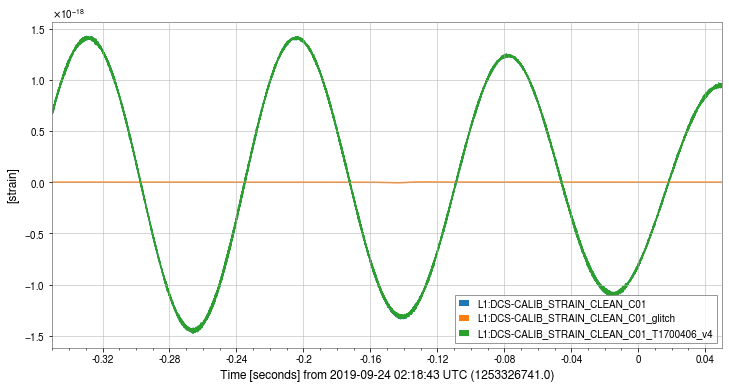

In [5]:
# plot all data in the frame file
plot = data_dict_cropped.plot()
ax = plot.gca()
ax.legend()
ax.set_ylabel('[strain]')
plot.show()

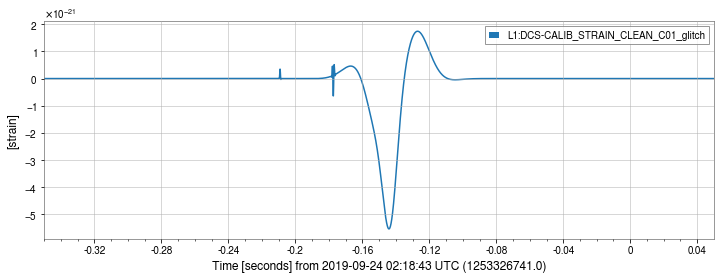

In [6]:
# plot only the glitch model 
plot = data_dict_cropped['L1:DCS-CALIB_STRAIN_CLEAN_C01_glitch'].plot(label='L1:DCS-CALIB_STRAIN_CLEAN_C01_glitch')
ax = plot.gca()
ax.legend()
ax.set_ylabel('[strain]')
plot.show()

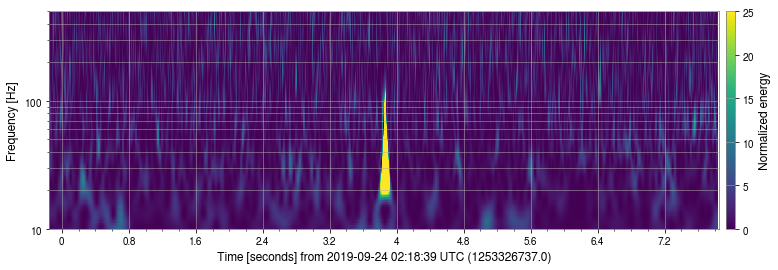

In [7]:
# plot a spectrogram the original data using the q-transorm
qscan = data_dict['L1:DCS-CALIB_STRAIN_CLEAN_C01']\
                    .crop(gps_glitch-32,gps_glitch+32)\
                    .q_transform(outseg=(gps_glitch-4, gps_glitch+4))

plot = qscan.plot(figsize=(12,4))
ax = plot.gca()
ax.set_xscale('seconds')
ax.set_yscale('log')
ax.set_ylim(10, 500)
ax.set_ylabel('Frequency [Hz]')
ax.grid(True, axis='y', which='both')
ax.colorbar(cmap='viridis', label='Normalized energy',vmin=0,vmax=25)
plot.show()

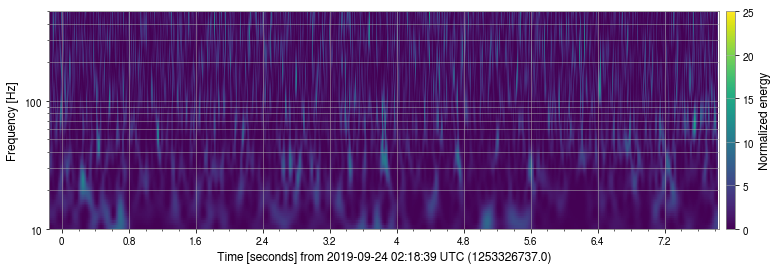

In [8]:
# plot a spectrogram of the data with the glitch subtracted using the q-transorm
qscan = data_dict['L1:DCS-CALIB_STRAIN_CLEAN_C01_T1700406_v4']\
                    .crop(gps_glitch-32,gps_glitch+32)\
                    .q_transform(outseg=(gps_glitch-4, gps_glitch+4))

plot = qscan.plot(figsize=(12,4))
ax = plot.gca()
ax.set_xscale('seconds')
ax.set_yscale('log')
ax.set_ylim(10, 500)
ax.set_ylabel('Frequency [Hz]')
ax.grid(True, axis='y', which='both')
ax.colorbar(cmap='viridis', label='Normalized energy',vmin=0,vmax=25)
plot.show()